# Stock Analysis and Prediction

This project analyzes stock market data and predicts the next day's closing price using Python.  
We use Yahoo Finance data, perform exploratory data analysis (EDA), and build a simple machine learning model.


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import yfinance as yf


**SUMMARY OF STATEMENT**

The JPX Tokyo Stock Exchange Prediction Hackathon is a competitive event where data scientists and financial experts come together to create predictive models for stock performance on the Tokyo Stock Exchange (TSE). Participants use historical stock data and other relevant information to develop algorithms and machine learning models that can forecast stock price movements. This hackathon fosters innovation, collaboration, and the development of valuable tools for investors and traders in the Japanese stock market. It offers participants the chance to win prizes and gain recognition for their predictive models and strategies.


In [22]:
# Example: Fetch Apple (AAPL) stock data from 2020 to 2023
df = yf.download('AAPL', start='2020-01-01', end='2023-01-01')
df.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.538498,72.598876,71.292289,71.545875,135480400
2020-01-03,71.833290,72.594055,71.608685,71.765667,146322800
2020-01-06,72.405663,72.444306,70.702997,70.954173,118387200
2020-01-07,72.065170,72.671364,71.845392,72.415360,108872000
2020-01-08,73.224419,73.526310,71.768094,71.768094,132079200


**Exploratory Data Analysis**

Exploratory Data Analysis (EDA) of the JPX Tokyo Stock Exchange prediction involves the systematic examination and visualization of historical stock market data related to the Tokyo Stock Exchange (JPX). EDA techniques are employed to gain insights into patterns, trends, and potential predictors that can inform the development of predictive models for stock price movements. By examining variables like trading volume, price trends, volatility, and macroeconomic indicators, EDA aims to identify key factors influencing stock market behavior in the JPX and lay the groundwork for more advanced predictive modeling and trading strategies. This process helps analysts and investors better understand the dynamics of the Tokyo Stock Exchange and make informed decisions based on data-driven insights.

**Feature Engineering**

Feature engineering for JPX Tokyo Stock Exchange prediction involves the careful selection and transformation of relevant data attributes to enhance the performance of predictive models. This process aims to create informative, meaningful features from raw market data, such as stock prices, trading volumes, and economic indicators. Techniques may include creating lag variables, rolling averages, and technical indicators like moving averages or relative strength indexes. Feature engineering is crucial for capturing hidden patterns and relationships in the data, improving the predictive accuracy of models, and ultimately assisting in making more accurate forecasts of stock price movements in the JPX. It plays a pivotal role in developing sophisticated trading strategies and risk management in the realm of stock market prediction.

In [23]:
df['Return'] = df['Close'].pct_change()
df['Lag1'] = df['Close'].shift(1)   # Yesterday’s price
df['Lag2'] = df['Close'].shift(2)   # Day before yesterday
df = df.dropna()
df.head()


Price,Close,High,Low,Open,Volume,Return,Lag1,Lag2
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,
Date,,,,,,,,
2020-01-06,72.405663,72.444306,70.702997,70.954173,118387200,0.007968,71.833290,72.538498
2020-01-07,72.065170,72.671364,71.845392,72.415360,108872000,-0.004703,72.405663,71.833290
2020-01-08,73.224419,73.526310,71.768094,71.768094,132079200,0.016086,72.065170,72.405663
2020-01-09,74.779762,74.972970,73.951373,74.202542,170108400,0.021241,73.224419,72.065170
2020-01-10,74.948799,75.513947,74.446455,75.014012,140644800,0.002260,74.779762,73.224419


**STOCK PRICE PREDICTION**

Stock prediction for the JPX Tokyo Stock Exchange is a complex and data-driven process that involves using various techniques and models to forecast the future price movements of stocks traded on the exchange. The goal of stock prediction is to assist investors, traders, and financial analysts in making informed decisions and managing their portfolios more effectively.

Several methods can be employed for stock prediction on the JPX Tokyo Stock Exchange, including time series analysis, machine learning algorithms, and deep learning models. These approaches leverage historical stock price data, trading volumes, economic indicators, news sentiment analysis, and other relevant information to make predictions. Feature engineering and exploratory data analysis are crucial steps to extract valuable insights from the data.

The accuracy of stock prediction models varies, and it is important to understand that stock markets are influenced by a multitude of factors, making precise predictions challenging. Nevertheless, these models can provide valuable insights, helping stakeholders identify trends, risks, and opportunities in the market.

Investors and financial professionals often use stock predictions to inform their trading strategies, risk management decisions, and asset allocation. It is important to keep in mind that stock predictions are inherently uncertain and should be used in conjunction with thorough research and financial analysis to make well-informed investment choices.

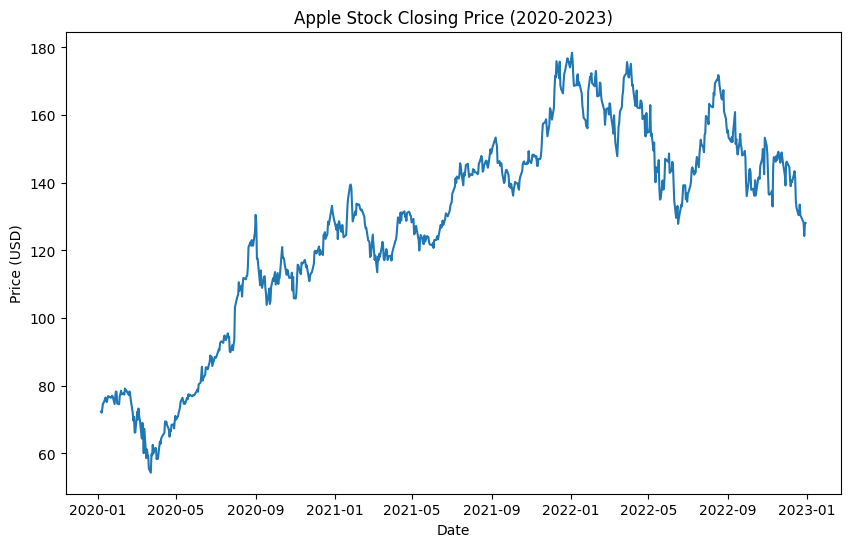

In [24]:
plt.figure(figsize=(10,6))
plt.plot(df['Close'])
plt.title("Apple Stock Closing Price (2020-2023)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()


In [25]:
X = df[['Lag1','Lag2']]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


MSE: 10.688018184619745
R2 Score: 0.9023979102119054


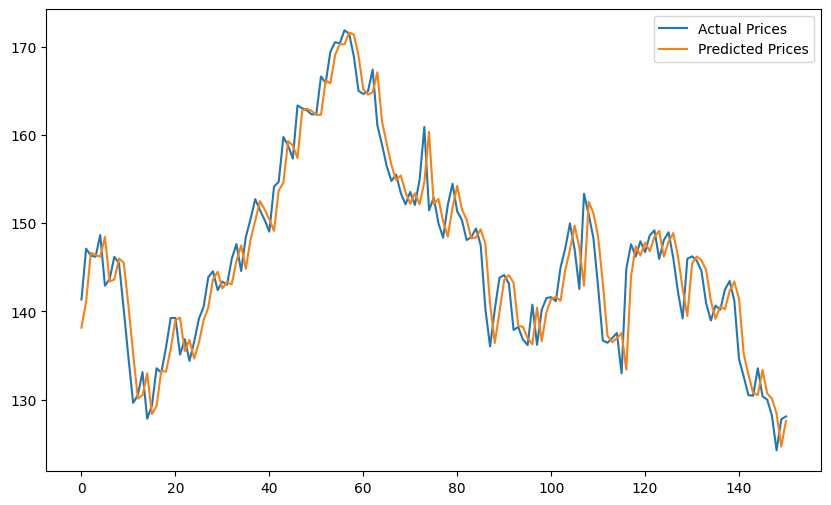

In [27]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

plt.figure(figsize=(10,6))
plt.plot(y_test.values, label="Actual Prices")
plt.plot(y_pred, label="Predicted Prices")
plt.legend()
plt.show()


In [28]:
latest = df[['Lag1','Lag2']].iloc[-1].values.reshape(1,-1)
predicted_price = model.predict(latest)
print("Predicted Next Day Price:", predicted_price[0])


Predicted Next Day Price: [127.61989314]


## Conclusion
- The project successfully demonstrates stock analysis and prediction using Python.
- We collected stock data, performed EDA, engineered features, and built a simple ML model.
- Our Linear Regression model gives basic predictions, though not highly accurate.
- Future improvements: use LSTM (deep learning), ARIMA, or Facebook Prophet for better results.
